In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import langid
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
def detect_lang(x):
    '''
    1. Takes the input and detects the language and assigns it to the lang
    2. Returns the first element in lang
    '''
    lang = langid.classify(x)
    return lang[0]

In [4]:
def load_review():
    '''
    1. Importing the csv file into a dataframe
    2. Dropping columns other than business_id, stars and text
    3. Applying the language detection on the text reviews
    4. Filter the dataframe based on language of text 
    5. Return the dataframe
    '''
    
    reviews = pd.read_csv('review.csv', nrows=10000)
    
    reviews = reviews.loc[:, ["business_id", "stars", "text"]]

    reviews['lang'] = reviews['text'].apply(lambda row: detect_lang(row))
    
    review = reviews.loc[reviews['lang'] == 'en']
    
    return review

In [19]:
review_df = load_review()

In [31]:
review_df.head()

,business_id,stars,text,lang
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,en
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,en
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...,en
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...,en
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...,en


In [32]:
review_df.describe()

,stars
count,9953.000000
mean,3.715463
std,1.473240
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [33]:
review_df.dtypes

business_id     object
stars          float64
text            object
lang            object
dtype: object

In [34]:
review_df['text'] = review_df['text'].astype('str') 

In [36]:
review_df.dtypes

business_id     object
stars          float64
text            object
lang            object
dtype: object

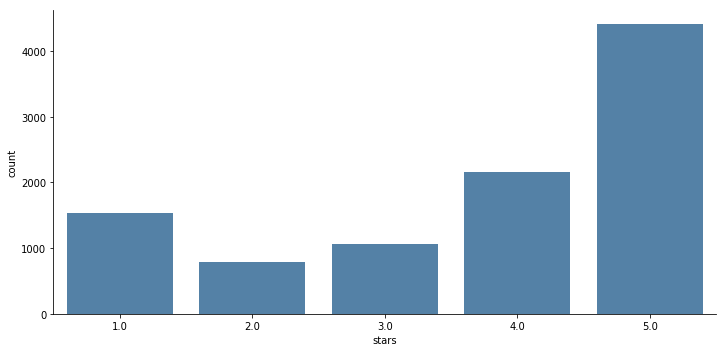

In [8]:
plot  = sns.catplot("stars", data=review_df, aspect=2, kind="count", color='steelblue')
plot

In [14]:
def check_stars(x):
    '''
    1. Takes the input and checks if its positive or negative or neutral and assigns it to the label
    2. Returns the label
    '''
    label = 'positive' if x > 3.0 else ('neutral' if x == 3.0 else 'negative')
    return label

In [38]:
def pre_process(x):
    '''
    Takes in variables, then performs the following:
    1. Assigns the varaibles to dataframe
    2. Calculates Polarity of each review and returns it to a new column in yelp dataframe
    3. Calculates Sentiment_lablel of each review and returns it to a new column in yelp dataframe
    4. Assigns the text, stars and sentiment_label to 2 variables and returns the variables
    '''
        
    yelp = x
    
    yelp['sentiment'] = yelp['text'].apply(lambda review: TextBlob(review).polarity)
    
    yelp['sentiment_label'] = yelp['sentiment'].apply(lambda row: check_stars(row))
    
    yelp = yelp.dropna()
    
    
    
    return yelp

In [39]:
yelp_df = pre_process(review_df)
yelp_df.head()

,business_id,stars,text,lang,sentiment,sentiment_label
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,en,-0.333333,negative
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,en,0.315810,negative
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...,en,0.429125,negative
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...,en,0.832500,negative
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...,en,0.049277,negative


In [40]:
#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
yelp_df['text'] = yelp_df['text'].apply(lambda x: x.lower())
# tokenize
yelp_df['text'] = yelp_df['text'].apply(lambda x: tokenizer.tokenize(x))
# visual check
yelp_df.head()

,business_id,stars,text,lang,sentiment,sentiment_label
0,ujmEBvifdJM6h6RLv4wQIg,1.0,"[total, bill, for, this, horrible, service, ov...",en,-0.333333,negative
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"[i, adore, travis, at, the, hard, rock, s, new...",en,0.315810,negative
2,WTqjgwHlXbSFevF32_DJVw,5.0,"[i, have, to, say, that, this, office, really,...",en,0.429125,negative
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"[went, in, for, a, lunch, steak, sandwich, was...",en,0.832500,negative
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,"[today, was, my, second, out, of, three, sessi...",en,0.049277,negative


In [41]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

In [42]:
# Check feature count
count_unique(yelp_df['text'])

25419

In [13]:
stop = set(stopwords.words('english'))
print(stop)

{'her', 'from', 'my', 'aren', "couldn't", 'on', 'couldn', "doesn't", "mustn't", 'yours', 'his', 'o', 'once', 'other', 'will', 'me', 'yourselves', 'ma', 'them', 'are', 'by', 'more', 'isn', 'you', 'and', 'over', "aren't", 'been', 'weren', 'against', 'had', 'any', 'here', "hadn't", 'mustn', 'then', 'through', 'further', 'theirs', "that'll", 'was', 'having', 'our', 'after', 'yourself', 'before', 'when', 'hasn', 'very', 'he', 'ain', 'y', 'most', 're', 'myself', 'shouldn', 'which', "she's", 's', 'do', "wasn't", 'needn', 'or', 'the', 'be', 'just', 'again', 'where', 'their', "it's", 've', 'so', 'under', 'both', 'hadn', 'few', 'own', "wouldn't", 'such', 'll', 'whom', 'in', 'didn', 'm', 'were', 'about', "you're", 'is', 'too', 'your', 'off', "shouldn't", 'mightn', 'this', 'wasn', 'not', 'themselves', 't', 'those', 'than', "you'll", "hasn't", "didn't", 'has', 'a', 'ourselves', 'being', 'of', 'am', 'does', 'these', "shan't", 'wouldn', "should've", 'for', "needn't", 'out', 'that', 'who', 'should', '

In [28]:
def stop_words(words):
    stop = set(stopwords.words('english'))
    # Ensure "not" is kept
    stop.remove("not")
    return [item for item in words if item not in stop]

In [29]:
yelp_df['text_stop'] = yelp_df['text'].apply(lambda review: stop_words(review))

In [30]:
yelp_df.head()

,business_id,stars,text,lang,text_stop
0,ujmEBvifdJM6h6RLv4wQIg,1.0,"[total, bill, for, this, horrible, service, ov...",en,"[total, bill, horrible, service, 8gs, crooks, ..."
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"[i, adore, travis, at, the, hard, rock, s, new...",en,"[adore, travis, hard, rock, new, kelly, carden..."
2,WTqjgwHlXbSFevF32_DJVw,5.0,"[i, have, to, say, that, this, office, really,...",en,"[say, office, really, together, organized, fri..."
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"[went, in, for, a, lunch, steak, sandwich, was...",en,"[went, lunch, steak, sandwich, delicious, caes..."
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,"[today, was, my, second, out, of, three, sessi...",en,"[today, second, three, sessions, paid, althoug..."
